# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.836242e+01     1.299796e+01
 * time: 0.0016469955444335938
     1     3.131350e+01     7.358091e+00
 * time: 0.0072479248046875
     2     2.663488e+01     4.744446e+00
 * time: 0.01237177848815918
     3     2.132139e+01     2.057084e+00
 * time: 0.017709970474243164
     4     1.987337e+01     1.739358e+00
 * time: 0.023067951202392578
     5     1.977061e+01     3.623793e+00
 * time: 0.027768850326538086
     6     1.938260e+01     2.172986e+00
 * time: 0.032254934310913086
     7     1.900060e+01     2.126056e+00
 * time: 0.03660297393798828
     8     1.855181e+01     1.323268e+00
 * time: 0.04096388816833496
     9     1.822848e+01     1.275387e+00
 * time: 0.04542279243469238
    10     1.799505e+01     9.578839e-01
 * time: 0.04994797706604004
    11     1.782256e+01     7.071591e-01
 * time: 0.05436992645263672
    12     1.770752e+01     7.113307e-01
 * time: 0.05875682830810547
    13     1.763476e+01     4.481722e-01
 * 

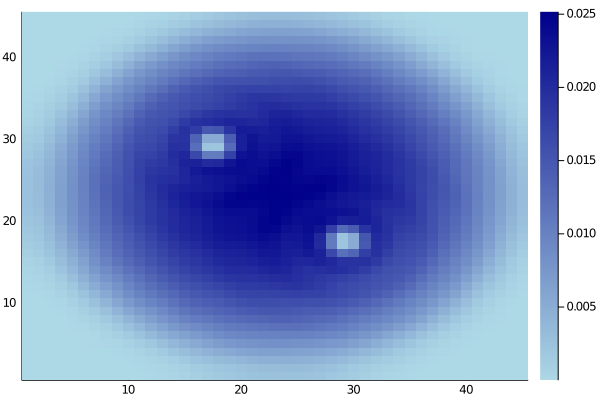

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)